In [4]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications import resnet50
import matplotlib.pyplot as plt
import numpy as np

In [92]:
#이미지 이름 바꿔주기

# import os

# images_path = '/Users/macbookair/development/DotoritAI/Dotorit/images'

# folder_list = os.listdir(images_path)

# for i, foldername in enumerate(folder_list):
#     print(foldername)

#     try:
#         folder_path = os.path.join(images_path, foldername)
#         file_list = os.listdir(folder_path)
#         new_name_prefix = str(foldername)+'_'

#         for j, filename in enumerate(file_list):
#             new_name = f'{new_name_prefix}{j+1}.jpg'
#             os.rename(os.path.join(folder_path, filename), os.path.join(folder_path, new_name))

#     except Exception as e:
#         if not foldername.startswith('.DS_Store'):
#             print('DS_Store 무시')
    


beauty products
media entertainments
.DS_Store
DIY_gardem products
bikes_bicycles
clothing_fashion goods
stationery
computers_PC
textbooks
bags_accessories
peripheral devices
mobile devices
small electronics
daily supplies
pet products
furniture_household goods
shoes
sports_outdoor products
luxury goods
toys_hobby supplies


In [ ]:
# 파일 형식 안맞는 이미지 파일들 제거해주기

# from pathlib import Path
# import imghdr

# data_dir = "/Users/macbookair/development/DotoritAI/Dotorit/images"
# image_extensions = [".png", ".jpg"]  # add there all your images file extensions

# img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
# for filepath in Path(data_dir).rglob("*"):
#     if filepath.suffix.lower() in image_extensions:
#         img_type = imghdr.what(filepath)
#         if img_type is None:
#             print(f"{filepath} is not an image")
#             os.remove(filepath)
#         elif img_type not in img_type_accepted_by_tf:
#             print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
#             os.remove(filepath)

In [120]:
batch_size = 9
img_height = 224
img_width = 224
epochs = 10

In [121]:
data_dir = "/Users/macbookair/development/DotoritAI/Dotorit/images"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=119,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 940 files belonging to 19 classes.
Using 752 files for training.


In [122]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 940 files belonging to 19 classes.
Using 188 files for validation.


In [123]:
class_names = train_ds.class_names
print(class_names)

['DIY & gardem products', 'bags & accessories', 'beauty products', 'bikes & bicycles', 'clothing & fashion goods', 'computers & PC', 'daily supplies', 'furniture & household goods', 'luxury goods', 'media entertainments', 'mobile devices', 'peripheral devices', 'pet products', 'shoes', 'small electronics', 'sports & outdoor products', 'stationery', 'textbooks', 'toys & hobby supplies']


2023-09-30 22:11:42.001972: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [752]
	 [[{{node Placeholder/_4}}]]
2023-09-30 22:11:42.002461: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [752]
	 [[{{node Placeholder/_4}}]]


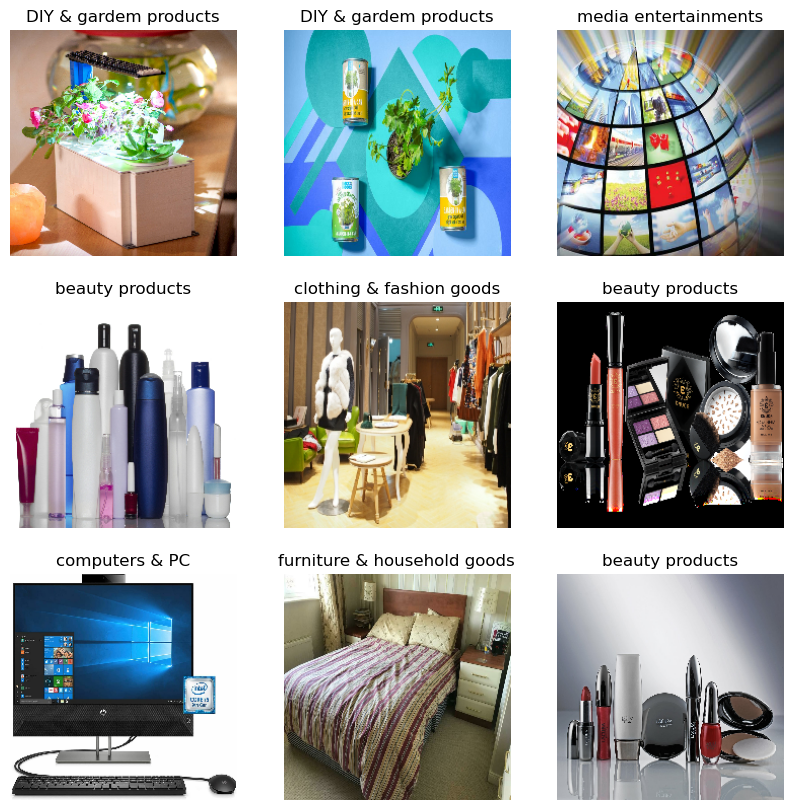

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [125]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

2023-09-30 22:11:50.247553: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [752]
	 [[{{node Placeholder/_4}}]]
2023-09-30 22:11:50.247814: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [752]
	 [[{{node Placeholder/_0}}]]


(9, 224, 224, 3)
(9,)


In [126]:
img_shape = (img_height , img_width, 3)
# include_top = False인 경우 input_shape = img_size 지정 필요
# conv에 대한 가중치 학습이 없음
VGG16_MODEL = tf.keras.applications.VGG16(input_shape = img_shape,
                                         include_top = False,
                                         weights = 'imagenet')

In [127]:
VGG16_MODEL.trainable=False
# flatten이 없음 ( globalaveragepooling으로 대체 )
#  ==> 가중치가 필요없음
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

# FFNN의 가중치는 학습됨
prediction_layer = tf.keras.layers.Dense(len(class_names),
                                         activation ='softmax' )

model = tf.keras.Sequential([
    VGG16_MODEL,
    global_average_layer,
    prediction_layer
])
# model : vgg16이 갖고있는 가중치 + FFNN 가중치로 학습

In [128]:
#sparse : 희소 
# 분류가 아주 많을 때 사용( ex)마트에서 물품 1개 )
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(train_ds, epochs=epochs,
                   validation_steps=2,validation_data=(val_ds))

Epoch 1/10
15/84 [====>.........................] - ETA: 3:11 - loss: 17.1054 - accuracy: 0.0370

2023-09-30 22:12:37.194549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/84 [==============================] - ETA: 0s - loss: 10.4644 - accuracy: 0.1622

2023-09-30 22:15:43.713327: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [188]
	 [[{{node Placeholder/_4}}]]
2023-09-30 22:15:43.713684: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [188]
	 [[{{node Placeholder/_4}}]]


84/84 [==============================] - 235s 3s/step - loss: 10.4644 - accuracy: 0.1622 - val_loss: 8.1421 - val_accuracy: 0.2222
Epoch 2/10
15/84 [====>.........................] - ETA: 3:06 - loss: 6.2419 - accuracy: 0.3111

2023-09-30 22:16:30.445419: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/84 [==============================] - 239s 3s/step - loss: 4.3263 - accuracy: 0.4295 - val_loss: 4.8628 - val_accuracy: 0.2778
Epoch 3/10
15/84 [====>.........................] - ETA: 3:17 - loss: 3.8457 - accuracy: 0.4889

2023-09-30 22:20:31.665066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/84 [==============================] - 242s 3s/step - loss: 2.6459 - accuracy: 0.5944 - val_loss: 5.4776 - val_accuracy: 0.5000
Epoch 4/10
15/84 [====>.........................] - ETA: 3:09 - loss: 2.4049 - accuracy: 0.6148

2023-09-30 22:24:32.159598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/84 [==============================] - 232s 3s/step - loss: 1.7428 - accuracy: 0.6915 - val_loss: 1.6973 - val_accuracy: 0.7778
Epoch 5/10
15/84 [====>.........................] - ETA: 3:04 - loss: 1.2714 - accuracy: 0.7704

2023-09-30 22:28:22.966525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/84 [==============================] - 232s 3s/step - loss: 1.0688 - accuracy: 0.7819 - val_loss: 0.7507 - val_accuracy: 0.8333
Epoch 6/10
15/84 [====>.........................] - ETA: 3:05 - loss: 0.8767 - accuracy: 0.8222

2023-09-30 22:32:15.275267: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/84 [==============================] - 230s 3s/step - loss: 0.6954 - accuracy: 0.8364 - val_loss: 1.3275 - val_accuracy: 0.7778
Epoch 7/10
15/84 [====>.........................] - ETA: 3:12 - loss: 0.6383 - accuracy: 0.8296

2023-09-30 22:36:06.491513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/84 [==============================] - 232s 3s/step - loss: 0.4335 - accuracy: 0.8989 - val_loss: 0.3301 - val_accuracy: 0.8889
Epoch 8/10
15/84 [====>.........................] - ETA: 3:13 - loss: 0.4341 - accuracy: 0.9111

2023-09-30 22:39:58.978198: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/84 [==============================] - 241s 3s/step - loss: 0.2911 - accuracy: 0.9348 - val_loss: 2.0266 - val_accuracy: 0.7778
Epoch 9/10
15/84 [====>.........................] - ETA: 3:14 - loss: 0.2033 - accuracy: 0.9556

2023-09-30 22:43:59.906440: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/84 [==============================] - 239s 3s/step - loss: 0.1829 - accuracy: 0.9574 - val_loss: 0.3026 - val_accuracy: 0.8889
Epoch 10/10
15/84 [====>.........................] - ETA: 3:09 - loss: 0.1830 - accuracy: 0.9481

2023-09-30 22:47:57.728841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/84 [==============================] - 235s 3s/step - loss: 0.1196 - accuracy: 0.9761 - val_loss: 0.3582 - val_accuracy: 0.9444


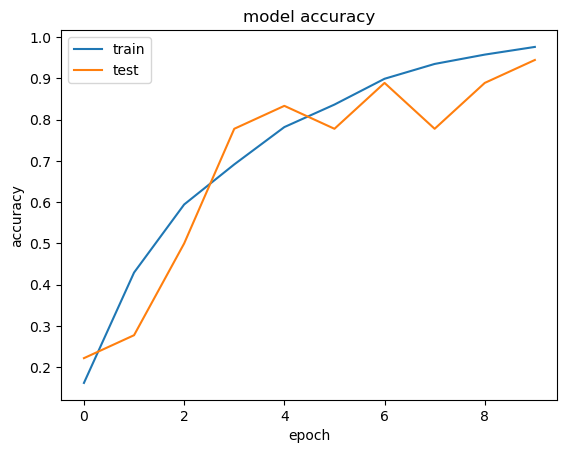

In [131]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

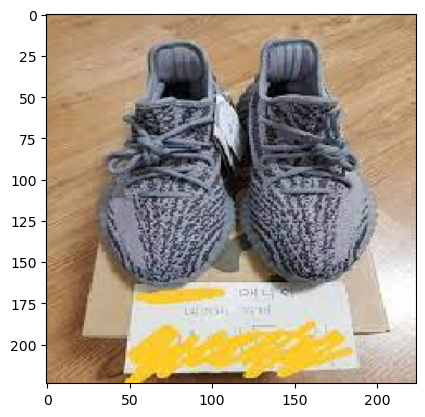

numpy array size :  (224, 224, 3)
1/1 [==============================] - 0s 335ms/step
결과 :  shoes


In [137]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import numpy as np

img_height = 224
img_width = 224

label_names = {0 : 'bags & accessories', 1 : 'beauty products',2 :'bikes & bicycles', 3:'clothing & fashion goods', 
                4:'computers & PC', 5:'daily supplies',  6:'DIY & gardem products', 7:'furniture & household goods',
                 8:'luxury goods', 9:'media entertainments', 10:'mobile devices', 11:'peripheral devices', 
                 12:'pet products', 13:'shoes', 14:'small electronics', 15:'sports & outdoor products', 
                 16:'stationery', 17:'textbooks', 18:'toys & hobby supplies' }

filename = './shoes_example2.jpg'
original = load_img(filename, target_size = (img_height,img_width))

numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print("numpy array size : ", numpy_image.shape)
image_batch = np.expand_dims(numpy_image , axis = 0)


predict = np.argmax(model.predict(image_batch))

print('결과 : ', label_names[predict])

In [129]:
model.save("saved_model/my_model")

INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [130]:
#레이어 붙인 구조 (말단 : (None,19))
loaded_model = tf.keras.models.load_model("saved_model/my_model")
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_4   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 19)                9747      
                                                                 
Total params: 14,724,435
Trainable params: 9,747
Non-trainable params: 14,714,688
_________________________________________________________________


In [9]:
#기존 모델 구조 (말단 : (None,1000))

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

model = VGG16(weights='imagenet')


img_path = './shoes_example2.jpg'  # 분류할 이미지 파일 경로
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

decoded_predictions = decode_predictions(preds, top=5)[0]  # 상위 5개 예측 결과
for i, (imagenetID, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")


1/1 [==============================] - 1s 531ms/step
1: running_shoe (0.53)
2: sandal (0.19)
3: swab (0.04)
4: wool (0.02)
5: packet (0.02)


In [10]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     